# Установка и импорт необходимых моуделй

In [ ]:
!pip install pymorphy2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# при работе через Google Colab
# прописать путь до всех файлов py
import sys
sys.path.append('/content/drive/MyDrive/Учёба/8 семестр/диплом/Проект/VKR/Блокноты')

In [4]:
import AnalysisFunc
import BaseFuncs

In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import scipy.stats as stats
figure(figsize=(30, 40), dpi=80)

<Figure size 2400x3200 with 0 Axes>

<Figure size 2400x3200 with 0 Axes>

In [13]:
path_to_data = "/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/"

# ИНФО

**Считывание файла**

`BaseFuncs.GetDataFrameListFromFileConverted(file_name)`

**Сохранение файла**

`BaseFuncs.SaveFileCSV(path, filename, results, csv = True)`

**Сделать столбцы float**

`AnalysisFunc.MakeFloat(data, addition_list_columns)`

`addition_list_columns` - дополнительные колонки для конвертирования

**Разделить столбцы на 100**

`AnalysisFunc.ModColumns100(data, columns)`

**Нарисовать графики распределения и BoxPlot**

`AnalysisFunc.DrawPlots(data)`

**Удалить выбросы через квартили**

`AnalysisFunc.DeleteByQuantile(data, q1 = 0.15)`

**Удалить выбросы через Z-значения**

`AnalysisFunc.DeleteByZ(data)`

**Столбце "*Баллы*" заменить на оценки**

`AnalysisFunc.CountMarkColumn(data)`

# Загрузка данных прошлого года

In [7]:
data = BaseFuncs.GetDataFrameListFromFileConverted(path_to_data+"Программирование и основы алгоритмизации тест.csv")
data.drop_duplicates(keep='last')
print(f"Длина файла до обработки: {len(data)}")
AnalysisFunc.FillColumnsList(data)
data = AnalysisFunc.MakeFloat(data, ["Пол"])
data = data.drop(data.columns.difference(["Не сдал(-а)", "Пол", "Команды", "Направление"]+AnalysisFunc.exams+AnalysisFunc.scores+AnalysisFunc.being+AnalysisFunc.before), axis=1)
print(f"Сдали: {len(data[data['Не сдал(-а)']==0])}, не сдали: {len(data[data['Не сдал(-а)']==1])}")
data.head(5)

Длина файла до обработки: 961
Index(['Пол', 'Не сдал(-а)', 'Посещение до Контрольная работа 1',
       'Баллы до Контрольная работа 1',
       'Процент баллов до Контрольная работа 1', 'Контрольная работа 1',
       'Посещение до Контрольная работа 2', 'Баллы до Контрольная работа 2',
       'Процент баллов до Контрольная работа 2', 'Контрольная работа 2',
       'Посещение до Контрольная работа 3', 'Баллы до Контрольная работа 3',
       'Процент баллов до Контрольная работа 3', 'Контрольная работа 3'],
      dtype='object')
Сдали: 801, не сдали: 160


,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Процент баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Процент баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Процент баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,0,0.93,16.0,0.52,12.0,1.0,6.0,0.26,12.0,0.43,10.0,0.43,12.0
1,1.0,0,1.0,3.5,0.11,7.38,1.0,1.2,0.05,4.49,1.0,0.0,0.0,7.5
2,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,1.0,15.0,0.48,11.7,1.0,6.0,0.26,11.8,1.0,8.0,0.35,15.5
4,0.0,0,0.86,16.0,0.52,4.48,0.5,6.0,0.26,10.08,1.0,8.0,0.35,15.0


In [9]:
data[AnalysisFunc.exams+AnalysisFunc.scores] = AnalysisFunc.ModColumns100(data, AnalysisFunc.exams+AnalysisFunc.scores)
for i, lst in enumerate([AnalysisFunc.exams, AnalysisFunc.scores, AnalysisFunc.being, AnalysisFunc.before]):
    for name in lst:
        print(f"{name}: Max: {data[name].max()}, Min: {data[name].min()}, Mean: {round(data[name].mean(), 2)}")

Контрольная работа 1: Max: 0.2, Min: 0.0, Mean: 0.09
Контрольная работа 2: Max: 0.2, Min: 0.0, Mean: 0.1
Контрольная работа 3: Max: 0.2, Min: 0.0, Mean: 0.1
Баллы до Контрольная работа 1: Max: 0.31, Min: 0.0, Mean: 0.11
Баллы до Контрольная работа 2: Max: 0.2302, Min: 0.0, Mean: 0.04
Баллы до Контрольная работа 3: Max: 0.231, Min: 0.0, Mean: 0.07
Посещение до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.79
Посещение до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.78
Посещение до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.76
Процент баллов до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.35
Процент баллов до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.19
Процент баллов до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.3


# Работа с направлениями

**Через LabelEncoder заменить Команды и Направление**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoderComands = LabelEncoder()
data["Команды"] = labelencoderComands.fit_transform(data["Команды"])
labelencoderDirs = LabelEncoder()
labelencoderDirs.fit(data["Направление"])
data["Направление"] = labelencoderDirs.transform(data["Направление"])

data.head(5)

,Команды,Направление,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Процент баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Процент баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Процент баллов до Контрольная работа 3,Контрольная работа 3
0,4,2,1.0,1,0.3,4.800000000000001,0.3,1.0,0.2,2.5,0.12,0.0,0.25,9.3,0.26,0.0
1,59,21,0.0,0,0.7,16.0,1.0,9.1,0.8,9.0,0.43,13.04,0.75,10.0,0.28,11.0
2,4,12,1.0,1,1.0,0.0,0.0,3.0,0.8,0.0,0.0,0.0,0.12,0.0,0.0,0.0
3,2,11,1.0,1,0.9,2.0,0.12,1.9,1.0,8.5,0.4,1.7,1.0,2.0,0.06,5.7
4,2,12,1.0,1,0.5,2.0,0.12,3.8,0.2,0.0,0.0,0.0,0.12,0.0,0.0,0.0


In [ ]:
from matplotlib import pyplot as plt
import plotly.express as px

for ex in AnalysisFunc.exams:
    fig = px.scatter_3d(data, x=f'Посещение до {ex}', y=f'Баллы до {ex}', z=ex, color=data["Не сдал(-а)"])
    fig.show()

In [ ]:
labelEncoderOriginal = labelencoderDirs.inverse_transform(data["Направление"])
for name, group in data.groupby("Направление"):
    dir = labelEncoderOriginal[group.loc(1)["Направление"].index][0]
    print(f"{dir}: {1-(group['Не сдал(-а)'].mean())}, {len(group)}")

In [ ]:
labelEncoderOriginal = labelencoderComands.inverse_transform(data["Команды"])
for name, group in data.groupby("Команды"):
    res = 1-(group['Не сдал(-а)'].mean())
    if res<0.6:
        dir = labelEncoderOriginal[group.loc(1)["Команды"].index][0]
        print(f"{dir}: {1-(group['Не сдал(-а)'].mean())}, {len(group)}")

# Распределение и выбросы

Контрольная работа 1: Max: 0.2, Min: 0.0, Mean: 0.09
Контрольная работа 2: Max: 0.2, Min: 0.0, Mean: 0.1
Контрольная работа 3: Max: 0.2, Min: 0.0, Mean: 0.1


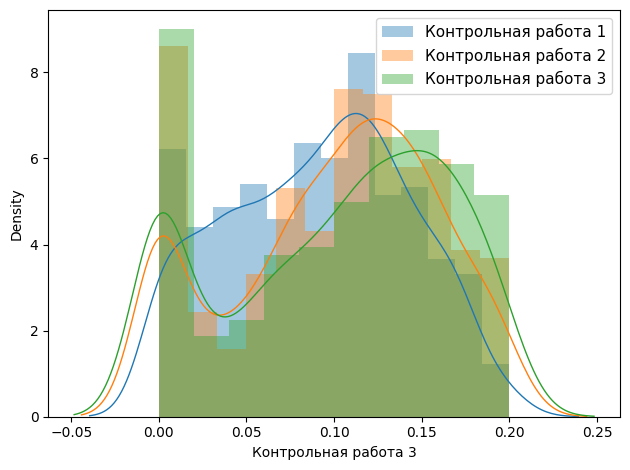

Баллы до Контрольная работа 1: Max: 0.31, Min: 0.0, Mean: 0.11
Баллы до Контрольная работа 2: Max: 0.2302, Min: 0.0, Mean: 0.04
Баллы до Контрольная работа 3: Max: 0.231, Min: 0.0, Mean: 0.07


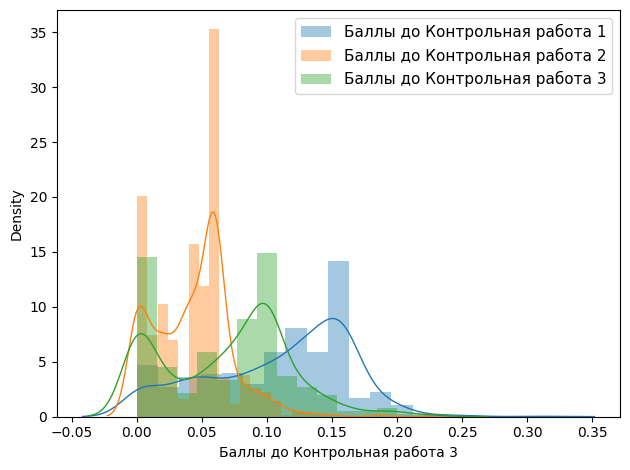

Посещение до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.79
Посещение до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.78
Посещение до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.76


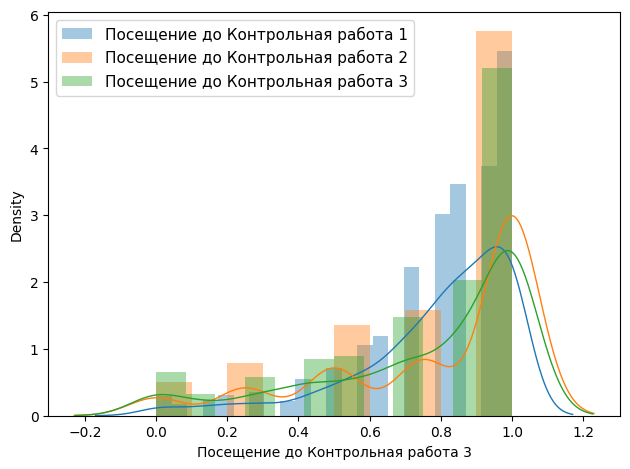

Процент баллов до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.35
Процент баллов до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.19
Процент баллов до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.3


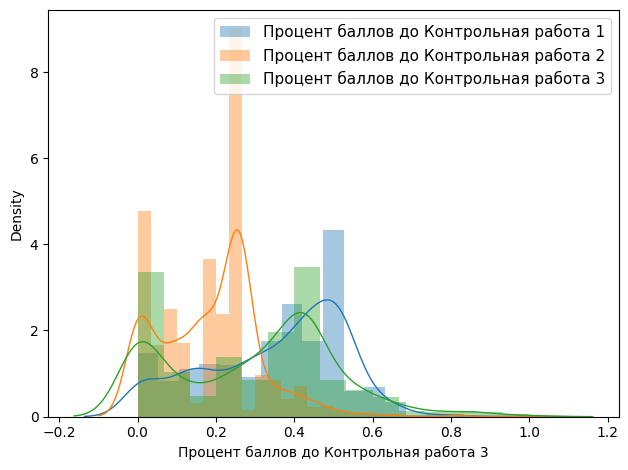

<Axes: >

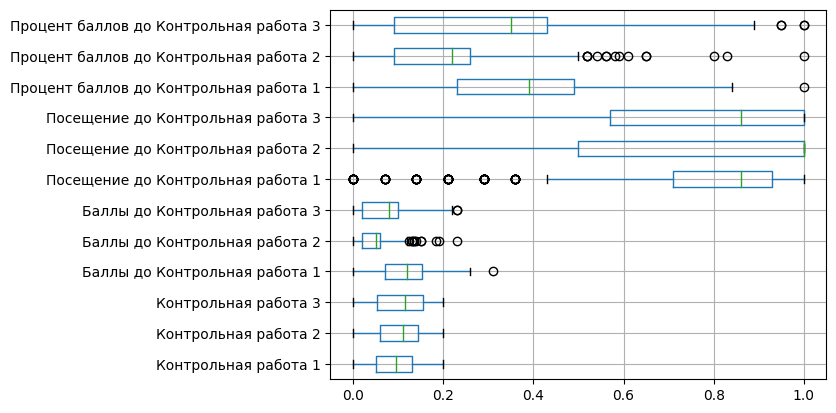

In [ ]:
AnalysisFunc.DrawPlots(data)

Контрольная работа 1: max = 26.0
Контрольная работа 2: max = 11.55
Контрольная работа 3: max = 22.0
902
Сдали: 754, не сдали: 148
Контрольная работа 1: Max: 0.2, Min: 0.0, Mean: 0.09
Контрольная работа 2: Max: 0.2, Min: 0.0, Mean: 0.1
Контрольная работа 3: Max: 0.2, Min: 0.0, Mean: 0.11


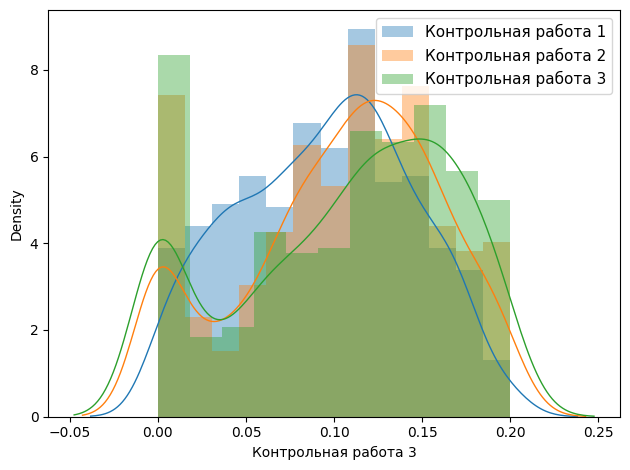

Баллы до Контрольная работа 1: Max: 0.26, Min: 0.0, Mean: 0.11
Баллы до Контрольная работа 2: Max: 0.1155, Min: 0.0, Mean: 0.04
Баллы до Контрольная работа 3: Max: 0.22, Min: 0.0, Mean: 0.07


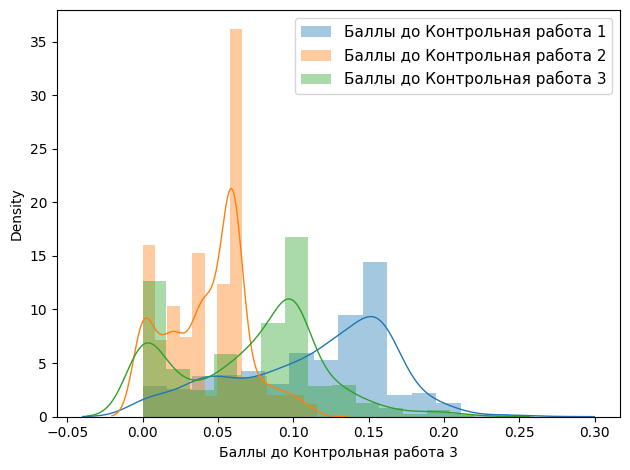

Посещение до Контрольная работа 1: Max: 1.0, Min: 0.29, Mean: 0.82
Посещение до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.81
Посещение до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.78


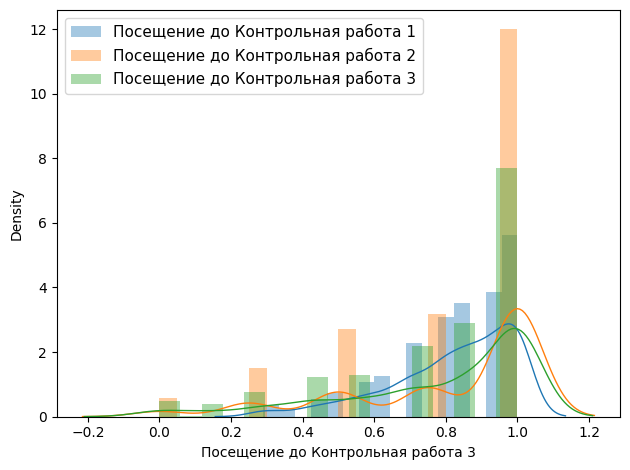

Процент баллов до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.44
Процент баллов до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.38
Процент баллов до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.32


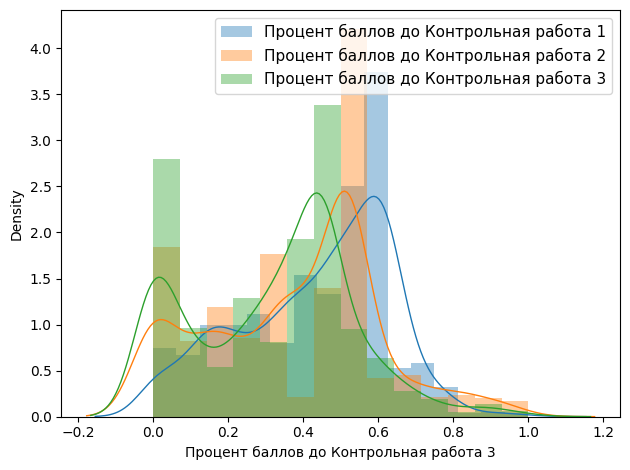

<Axes: >

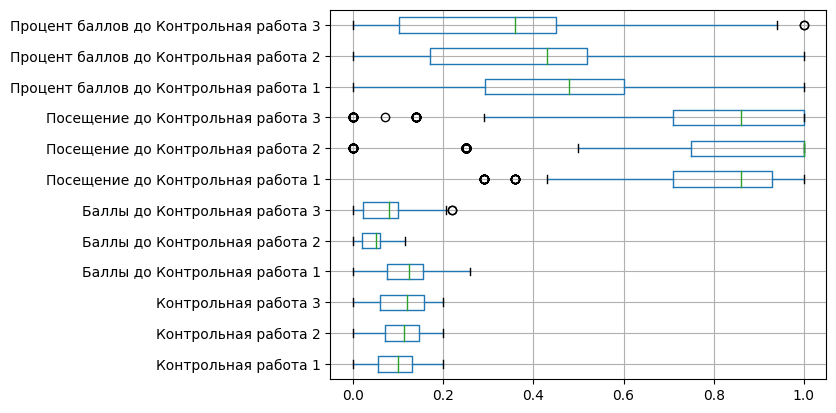

In [ ]:
data_Q = AnalysisFunc.DeleteByQuantile(data, 0.15)
print(len(data_Q))
print(f"Сдали: {len(data_Q[data_Q['Не сдал(-а)']==0])}, не сдали: {len(data_Q[data_Q['Не сдал(-а)']==1])}")

AnalysisFunc.DrawPlots(data_Q)

929
Сдали: 775, не сдали: 154
Контрольная работа 1: max = 26.0
Контрольная работа 2: max = 13.0
Контрольная работа 3: max = 20.6
929
Сдали: 775, не сдали: 154
Контрольная работа 1: Max: 0.2, Min: 0.0, Mean: 0.09
Контрольная работа 2: Max: 0.2, Min: 0.0, Mean: 0.1
Контрольная работа 3: Max: 0.2, Min: 0.0, Mean: 0.1


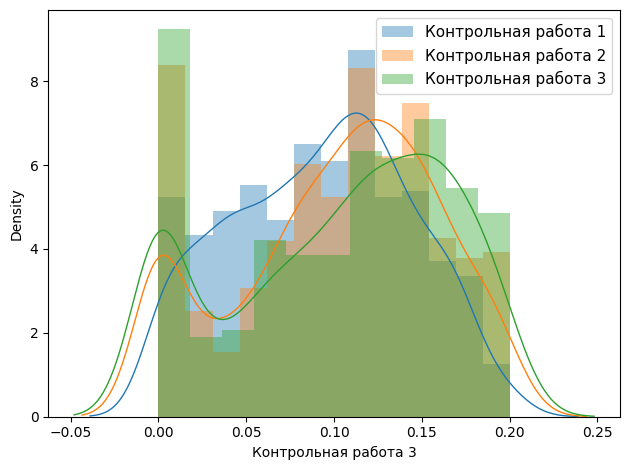

Баллы до Контрольная работа 1: Max: 0.26, Min: 0.0, Mean: 0.11
Баллы до Контрольная работа 2: Max: 0.13, Min: 0.0, Mean: 0.04
Баллы до Контрольная работа 3: Max: 0.20600000000000002, Min: 0.0, Mean: 0.07


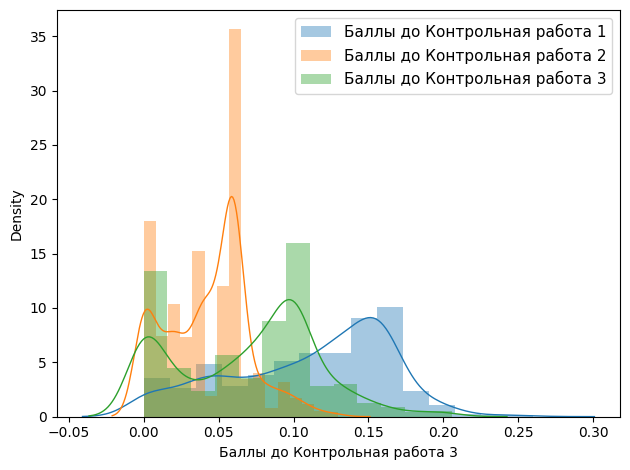

Посещение до Контрольная работа 1: Max: 1.0, Min: 0.14, Mean: 0.8
Посещение до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.79
Посещение до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.77


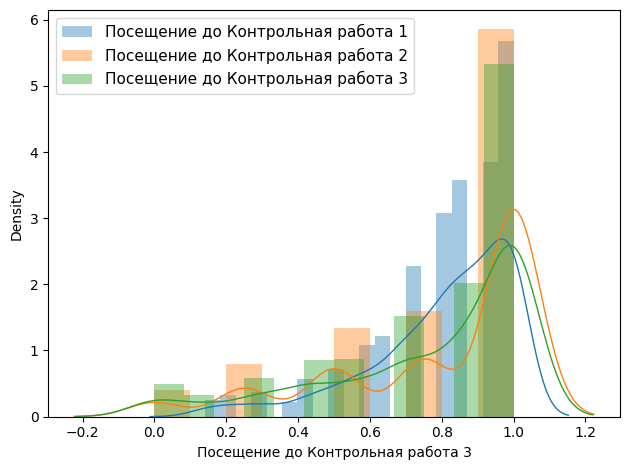

Процент баллов до Контрольная работа 1: Max: 1.0, Min: 0.0, Mean: 0.43
Процент баллов до Контрольная работа 2: Max: 1.0, Min: 0.0, Mean: 0.33
Процент баллов до Контрольная работа 3: Max: 1.0, Min: 0.0, Mean: 0.34


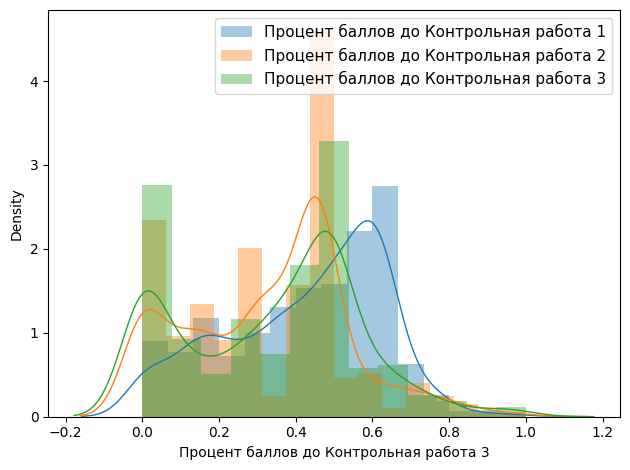

<Axes: >

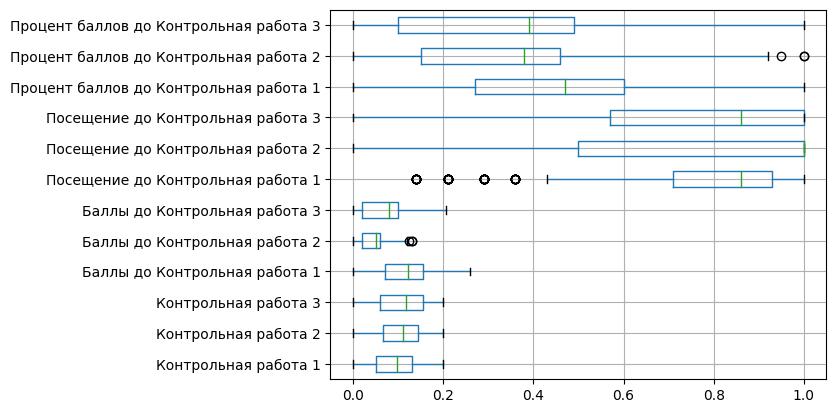

In [ ]:
data_Z = AnalysisFunc.DeleteByZ(data)
print(len(data_Z))
print(f"Сдали: {len(data_Z[data_Z['Не сдал(-а)']==0])}, не сдали: {len(data_Z[data_Z['Не сдал(-а)']==1])}")
AnalysisFunc.DrawPlots(data_Z)

In [ ]:
data_dict = {"Original": data, "Квартиль": data_Q, "По Z": data_Z}

# Корреляции

In [ ]:
for key, d in data_dict.items():
    print(f"Данные: {key}")
    for ex in AnalysisFunc.exams:
        print(d[d.loc[:, :ex].columns.difference(["Не сдал(-а)", "Оценка"])].corr()[ex].sort_values(ascending=False))
        print("__________________________")
    print(d.corr()["Не сдал(-а)"].sort_values(ascending=False))
    display(d[d.loc[:,:].columns.difference(["Оценка"]+AnalysisFunc.before)].corr().style.background_gradient(cmap='coolwarm'))
    print("///////////////////////////////\n")

Данные: Original
Контрольная работа 1                      1.000000
Процент баллов до Контрольная работа 1    0.569664
Баллы до Контрольная работа 1             0.569478
Посещение до Контрольная работа 1         0.466482
Пол                                      -0.025327
Name: Контрольная работа 1, dtype: float64
__________________________
Контрольная работа 2                      1.000000
Контрольная работа 1                      0.706044
Процент баллов до Контрольная работа 1    0.485494
Баллы до Контрольная работа 1             0.485301
Посещение до Контрольная работа 1         0.462351
Баллы до Контрольная работа 2             0.435484
Процент баллов до Контрольная работа 2    0.434535
Посещение до Контрольная работа 2         0.357982
Пол                                      -0.023922
Name: Контрольная работа 2, dtype: float64
__________________________
Контрольная работа 3                      1.000000
Контрольная работа 2                      0.755815
Контрольная работа 1       

,Баллы до Контрольная работа 1,Баллы до Контрольная работа 2,Баллы до Контрольная работа 3,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3,Не сдал(-а),Пол,Посещение до Контрольная работа 1,Посещение до Контрольная работа 2,Посещение до Контрольная работа 3
Баллы до Контрольная работа 1,1.000000,0.576415,0.642922,0.569478,0.485301,0.545512,-0.427808,-0.151092,0.521959,0.402754,0.467990
Баллы до Контрольная работа 2,0.576415,1.000000,0.673618,0.406540,0.435484,0.496386,-0.370195,-0.151712,0.390145,0.392907,0.464367
Баллы до Контрольная работа 3,0.642922,0.673618,1.000000,0.447631,0.415312,0.494468,-0.395654,-0.159634,0.407009,0.352340,0.521599
Контрольная работа 1,0.569478,0.406540,0.447631,1.000000,0.706044,0.682988,-0.415969,-0.025327,0.466482,0.383007,0.425314
Контрольная работа 2,0.485301,0.435484,0.415312,0.706044,1.000000,0.755815,-0.396678,-0.023922,0.462351,0.357982,0.512101
Контрольная работа 3,0.545512,0.496386,0.494468,0.682988,0.755815,1.000000,-0.422425,-0.065320,0.478347,0.390422,0.578054
Не сдал(-а),-0.427808,-0.370195,-0.395654,-0.415969,-0.396678,-0.422425,1.000000,0.095608,-0.189801,-0.125488,-0.219819
Пол,-0.151092,-0.151712,-0.159634,-0.025327,-0.023922,-0.065320,0.095608,1.000000,-0.037905,-0.047831,-0.060147
Посещение до Контрольная работа 1,0.521959,0.390145,0.407009,0.466482,0.462351,0.478347,-0.189801,-0.037905,1.000000,0.583374,0.625330
Посещение до Контрольная работа 2,0.402754,0.392907,0.352340,0.383007,0.357982,0.390422,-0.125488,-0.047831,0.583374,1.000000,0.574381


///////////////////////////////

Данные: Квартиль
Контрольная работа 1                      1.000000
Баллы до Контрольная работа 1             0.517687
Процент баллов до Контрольная работа 1    0.517299
Посещение до Контрольная работа 1         0.348417
Пол                                      -0.025082
Name: Контрольная работа 1, dtype: float64
__________________________
Контрольная работа 2                      1.000000
Контрольная работа 1                      0.679710
Процент баллов до Контрольная работа 1    0.430986
Баллы до Контрольная работа 1             0.430465
Процент баллов до Контрольная работа 2    0.416805
Баллы до Контрольная работа 2             0.416326
Посещение до Контрольная работа 1         0.355007
Посещение до Контрольная работа 2         0.266968
Пол                                      -0.036736
Name: Контрольная работа 2, dtype: float64
__________________________
Контрольная работа 3                      1.000000
Контрольная работа 2                      0.7

,Баллы до Контрольная работа 1,Баллы до Контрольная работа 2,Баллы до Контрольная работа 3,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3,Не сдал(-а),Пол,Посещение до Контрольная работа 1,Посещение до Контрольная работа 2,Посещение до Контрольная работа 3
Баллы до Контрольная работа 1,1.000000,0.576277,0.604456,0.517687,0.430465,0.498249,-0.448705,-0.157957,0.405374,0.304769,0.379189
Баллы до Контрольная работа 2,0.576277,1.000000,0.709652,0.426301,0.416326,0.494471,-0.402174,-0.186489,0.332931,0.364479,0.443147
Баллы до Контрольная работа 3,0.604456,0.709652,1.000000,0.407838,0.385135,0.468917,-0.404297,-0.167014,0.332477,0.286743,0.480862
Контрольная работа 1,0.517687,0.426301,0.407838,1.000000,0.679710,0.652002,-0.440276,-0.025082,0.348417,0.291263,0.345113
Контрольная работа 2,0.430465,0.416326,0.385135,0.679710,1.000000,0.729258,-0.420912,-0.036736,0.355007,0.266968,0.450063
Контрольная работа 3,0.498249,0.494471,0.468917,0.652002,0.729258,1.000000,-0.444402,-0.077956,0.390291,0.308902,0.531532
Не сдал(-а),-0.448705,-0.402174,-0.404297,-0.440276,-0.420912,-0.444402,1.000000,0.093693,-0.205633,-0.124630,-0.234376
Пол,-0.157957,-0.186489,-0.167014,-0.025082,-0.036736,-0.077956,0.093693,1.000000,-0.059808,-0.058323,-0.074436
Посещение до Контрольная работа 1,0.405374,0.332931,0.332477,0.348417,0.355007,0.390291,-0.205633,-0.059808,1.000000,0.478379,0.518087
Посещение до Контрольная работа 2,0.304769,0.364479,0.286743,0.291263,0.266968,0.308902,-0.124630,-0.058323,0.478379,1.000000,0.486820


///////////////////////////////

Данные: По Z
Контрольная работа 1                      1.000000
Баллы до Контрольная работа 1             0.546136
Процент баллов до Контрольная работа 1    0.545637
Посещение до Контрольная работа 1         0.418512
Пол                                      -0.016080
Name: Контрольная работа 1, dtype: float64
__________________________
Контрольная работа 2                      1.000000
Контрольная работа 1                      0.698953
Процент баллов до Контрольная работа 1    0.466108
Баллы до Контрольная работа 1             0.465766
Баллы до Контрольная работа 2             0.427629
Процент баллов до Контрольная работа 2    0.427232
Посещение до Контрольная работа 1         0.422204
Посещение до Контрольная работа 2         0.316432
Пол                                      -0.028180
Name: Контрольная работа 2, dtype: float64
__________________________
Контрольная работа 3                      1.000000
Контрольная работа 2                      0.74456

,Баллы до Контрольная работа 1,Баллы до Контрольная работа 2,Баллы до Контрольная работа 3,Контрольная работа 1,Контрольная работа 2,Контрольная работа 3,Не сдал(-а),Пол,Посещение до Контрольная работа 1,Посещение до Контрольная работа 2,Посещение до Контрольная работа 3
Баллы до Контрольная работа 1,1.000000,0.592797,0.629185,0.546136,0.465766,0.523117,-0.435254,-0.149036,0.477392,0.351712,0.428447
Баллы до Контрольная работа 2,0.592797,1.000000,0.715629,0.431308,0.427629,0.497938,-0.386532,-0.183003,0.382848,0.383473,0.466482
Баллы до Контрольная работа 3,0.629185,0.715629,1.000000,0.426556,0.413426,0.485600,-0.401631,-0.153223,0.385668,0.317201,0.513380
Контрольная работа 1,0.546136,0.431308,0.426556,1.000000,0.698953,0.670255,-0.425006,-0.016080,0.418512,0.338364,0.388076
Контрольная работа 2,0.465766,0.427629,0.413426,0.698953,1.000000,0.744565,-0.405084,-0.028180,0.422204,0.316432,0.488716
Контрольная работа 3,0.523117,0.497938,0.485600,0.670255,0.744565,1.000000,-0.427459,-0.063787,0.442409,0.350904,0.558707
Не сдал(-а),-0.435254,-0.386532,-0.401631,-0.425006,-0.405084,-0.427459,1.000000,0.092595,-0.193333,-0.117632,-0.227569
Пол,-0.149036,-0.183003,-0.153223,-0.016080,-0.028180,-0.063787,0.092595,1.000000,-0.042235,-0.049775,-0.069508
Посещение до Контрольная работа 1,0.477392,0.382848,0.385668,0.418512,0.422204,0.442409,-0.193333,-0.042235,1.000000,0.534816,0.575049
Посещение до Контрольная работа 2,0.351712,0.383473,0.317201,0.338364,0.316432,0.350904,-0.117632,-0.049775,0.534816,1.000000,0.533940


///////////////////////////////



# Считывание "нынешних данных"

In [11]:
dataReal = BaseFuncs.GetDataFrameListFromFileConverted("/content/drive/My Drive/Учёба/8 семестр/диплом/Проект/VKR/Учет контрольных/Программирование и основы алгоритмизации тест.csv")
dataReal = dataReal.drop(dataReal.columns.difference(["Не сдал(-а)", "Пол"]+AnalysisFunc.exams+AnalysisFunc.scores+AnalysisFunc.being+AnalysisFunc.before), axis=1)
dataReal = AnalysisFunc.MakeFloat(dataReal, ["Пол"])
# dataReal = dataReal.drop("Баллы", axis=1)
dataReal[AnalysisFunc.exams+AnalysisFunc.scores] = AnalysisFunc.ModColumns100(dataReal, AnalysisFunc.exams+AnalysisFunc.scores)
print(len(dataReal))

dataReal.head(5)

961


,Пол,Не сдал(-а),Посещение до Контрольная работа 1,Баллы до Контрольная работа 1,Процент баллов до Контрольная работа 1,Контрольная работа 1,Посещение до Контрольная работа 2,Баллы до Контрольная работа 2,Процент баллов до Контрольная работа 2,Контрольная работа 2,Посещение до Контрольная работа 3,Баллы до Контрольная работа 3,Процент баллов до Контрольная работа 3,Контрольная работа 3
0,1.0,1,0.3,0.048,0.30,0.010,0.2,0.025,0.12,0.0000,0.25,0.093,0.26,0.000
1,0.0,0,0.7,0.160,1.00,0.091,0.8,0.090,0.43,0.1304,0.75,0.100,0.28,0.110
2,1.0,1,1.0,0.000,0.00,0.030,0.8,0.000,0.00,0.0000,0.12,0.000,0.00,0.000
3,1.0,1,0.9,0.020,0.12,0.019,1.0,0.085,0.40,0.0170,1.00,0.020,0.06,0.057
4,1.0,1,0.5,0.020,0.12,0.038,0.2,0.000,0.00,0.0000,0.12,0.000,0.00,0.000
